# scikit-learn Classification Tutorial (feature scaling)
* MinMax scalar on diabetes dataset.

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import sklearn.metrics as metrics
!gdown 1BLKSo30I4bpxIlLlFeGXHCzUGdGyatIM

df = pd.read_csv("/content/diabetes.csv")
print(df.info())
df.head()


Downloading...
From: https://drive.google.com/uc?id=1BLKSo30I4bpxIlLlFeGXHCzUGdGyatIM
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 58.1MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[[0.17647059 0.42211055 0.59016393 ... 0.55439642 0.08396268 0.1372549 ]
 [0.         0.59296482 0.52459016 ... 0.         0.73434029 0.        ]
 [0.58823529 0.46231156 0.50819672 ... 0.38599106 0.03953798 0.19607843]
 ...
 [0.23529412 0.6281407  0.57377049 ... 0.43070045 0.4735673  0.47058824]
 [0.17647059 0.58291457 0.60655738 ... 0.39195231 0.01288316 0.05882353]
 [0.23529412 0.55276382 0.54098361 ... 0.47540984 0.17458907 0.15686275]]


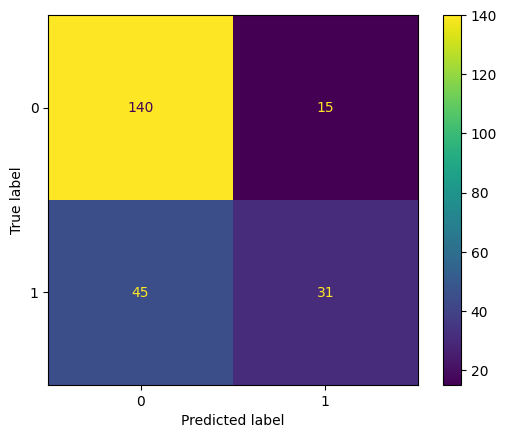

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       155
           1       0.67      0.41      0.51        76

    accuracy                           0.74       231
   macro avg       0.72      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231



In [7]:
# df['Outcome'] = df['Outcome'].astype("string")

x = df.drop("Outcome", axis=1)
y= df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2)


scaler = MinMaxScaler().fit(x_train) #create a scaler from only training dataset
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_predict = logisticRegr.predict(x_test)
# print(predictions)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.show()

print(classification_report(y_test, y_predict))

#feature importance from weights in logistic regression

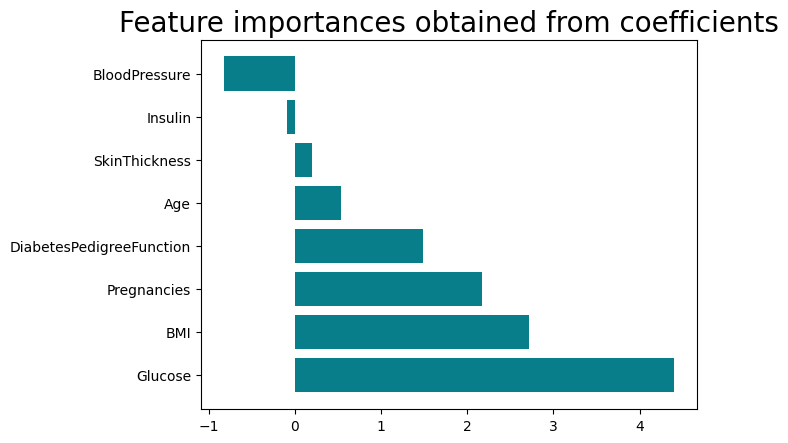

In [8]:
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': logisticRegr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.barh(y=importances['Attribute'], width=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
# plt.xticks(rotation='vertical')
plt.show()

#using select K-best

In [9]:
import sklearn.feature_selection as fs

selector = fs.SelectKBest(fs.chi2, k=3)
selector.fit(x, y)
X_trans = selector.transform(x)

scores = selector.scores_
# filter = selector.get_support()

selector_df = pd.DataFrame(scores.reshape(1, 8),columns=x.columns.values)
print(selector_df)
print(x.head())
print(X_trans)


   Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
0   111.519691  1411.887041      17.605373       53.10804  2175.565273   

          BMI  DiabetesPedigreeFunction         Age  
0  127.669343                  5.392682  181.303689  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
[[148.   0.  50.]
 [ 85.   0.  31.]
 [183.   0.  32.]
 ...
 [121. 112.  30.]
 [126.   0.  47.]
 [ 93

# Try all combinations

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


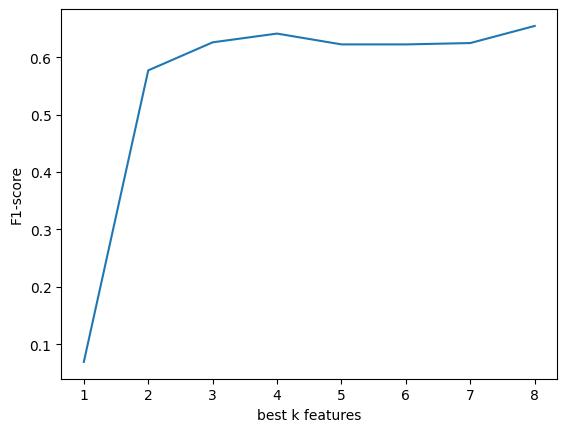

In [10]:

f1_list = []
for k in range(1, 9):
    bk = fs.SelectKBest(fs.chi2, k=k)
    bk.fit(x, y)
    X_trans = bk.transform(x)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred)
    f1_list.append(f1)

fig, axe = plt.subplots(dpi = 100)
axe.plot(range(1, 9), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
plt.show()